<a href="https://colab.research.google.com/github/nvwa0318/Project-Eniac-2/blob/main/good%20regression%20model%20for%20house%20pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#import data
url = "https://drive.google.com/file/d/15SUtAeKmyMu-OXkaWK85ILdVYPxGQ_3S/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Data = pd.read_csv(path)
Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
Taa=Data
cols=Data.select_dtypes(exclude ='object').columns
cols=cols.drop(['HalfBath','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','EnclosedPorch'])
fig = go.Figure(data=
    go.Parcoords(line = dict(color = Taa['SalePrice'], colorscale =px.colors.sequential.Reds),
        dimensions = [dict(label=col, values=Taa[col]) for col in cols]))

fig.update_layout(
    title="Dates")
fig.update_layout(
    autosize=False,
    width=2100,
    height=500,)
fig.show()

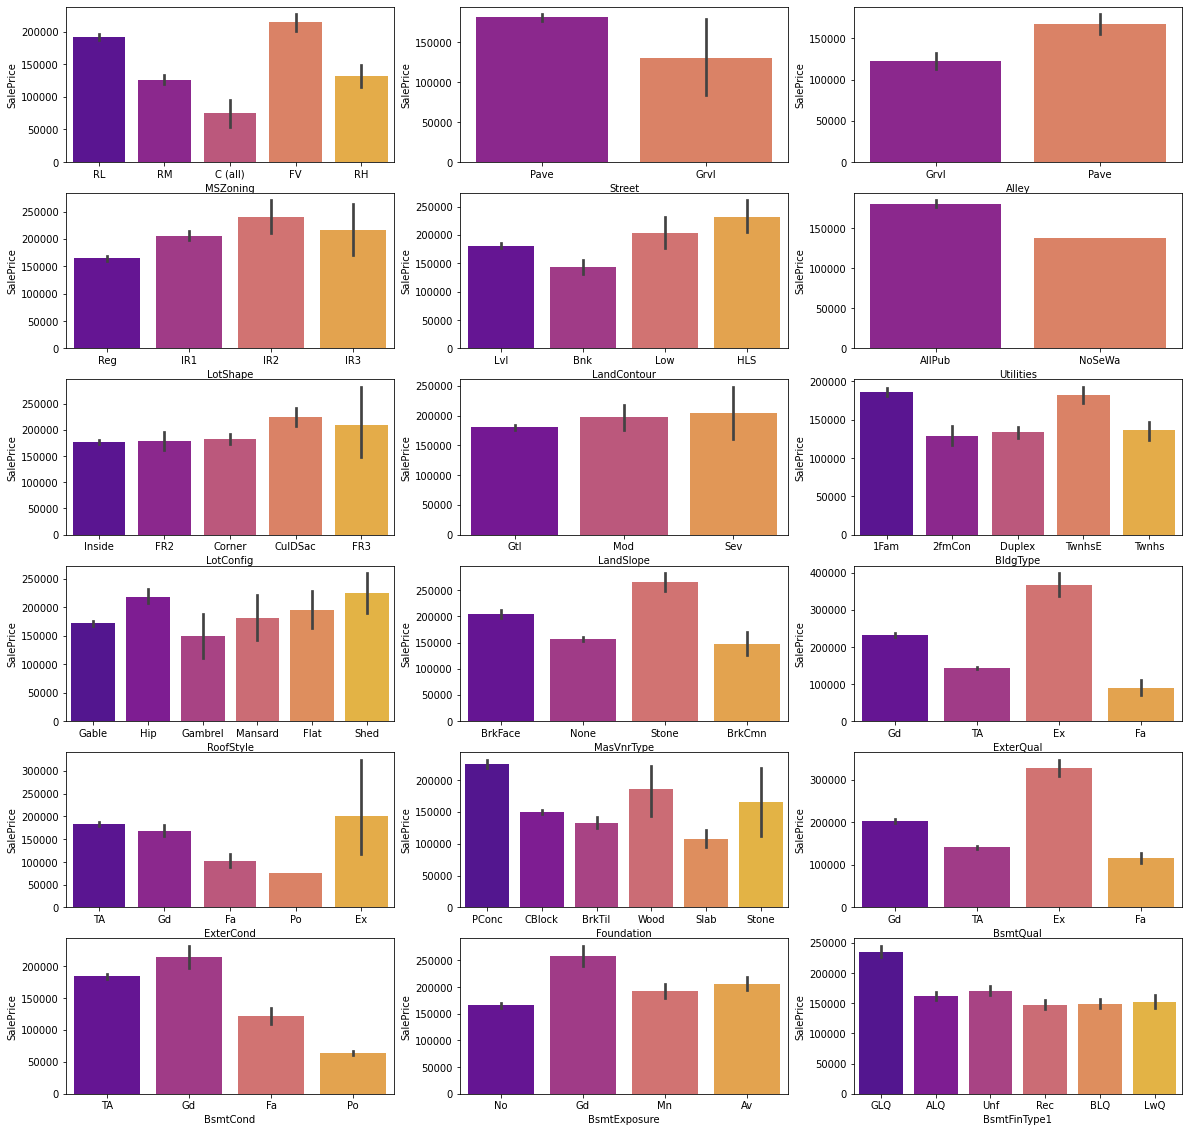

In [ ]:
L=[]
for i in Data.columns:
    if(len(list(Data[i].drop_duplicates()))<8):
        L.append(i)
L=L[:42] 
fig, ax = plt.subplots(6,3,figsize=(20,20))
z=1
L1=L[:18]
for i in L1:
    plt.subplot(6,3,z)
    Data[['SalePrice',i]].groupby([i],as_index=False).sum().sort_values(by='SalePrice',ascending=False)
    sns.barplot(x =i, y ='SalePrice', data = Data,
            palette ='plasma')
    z=z+1


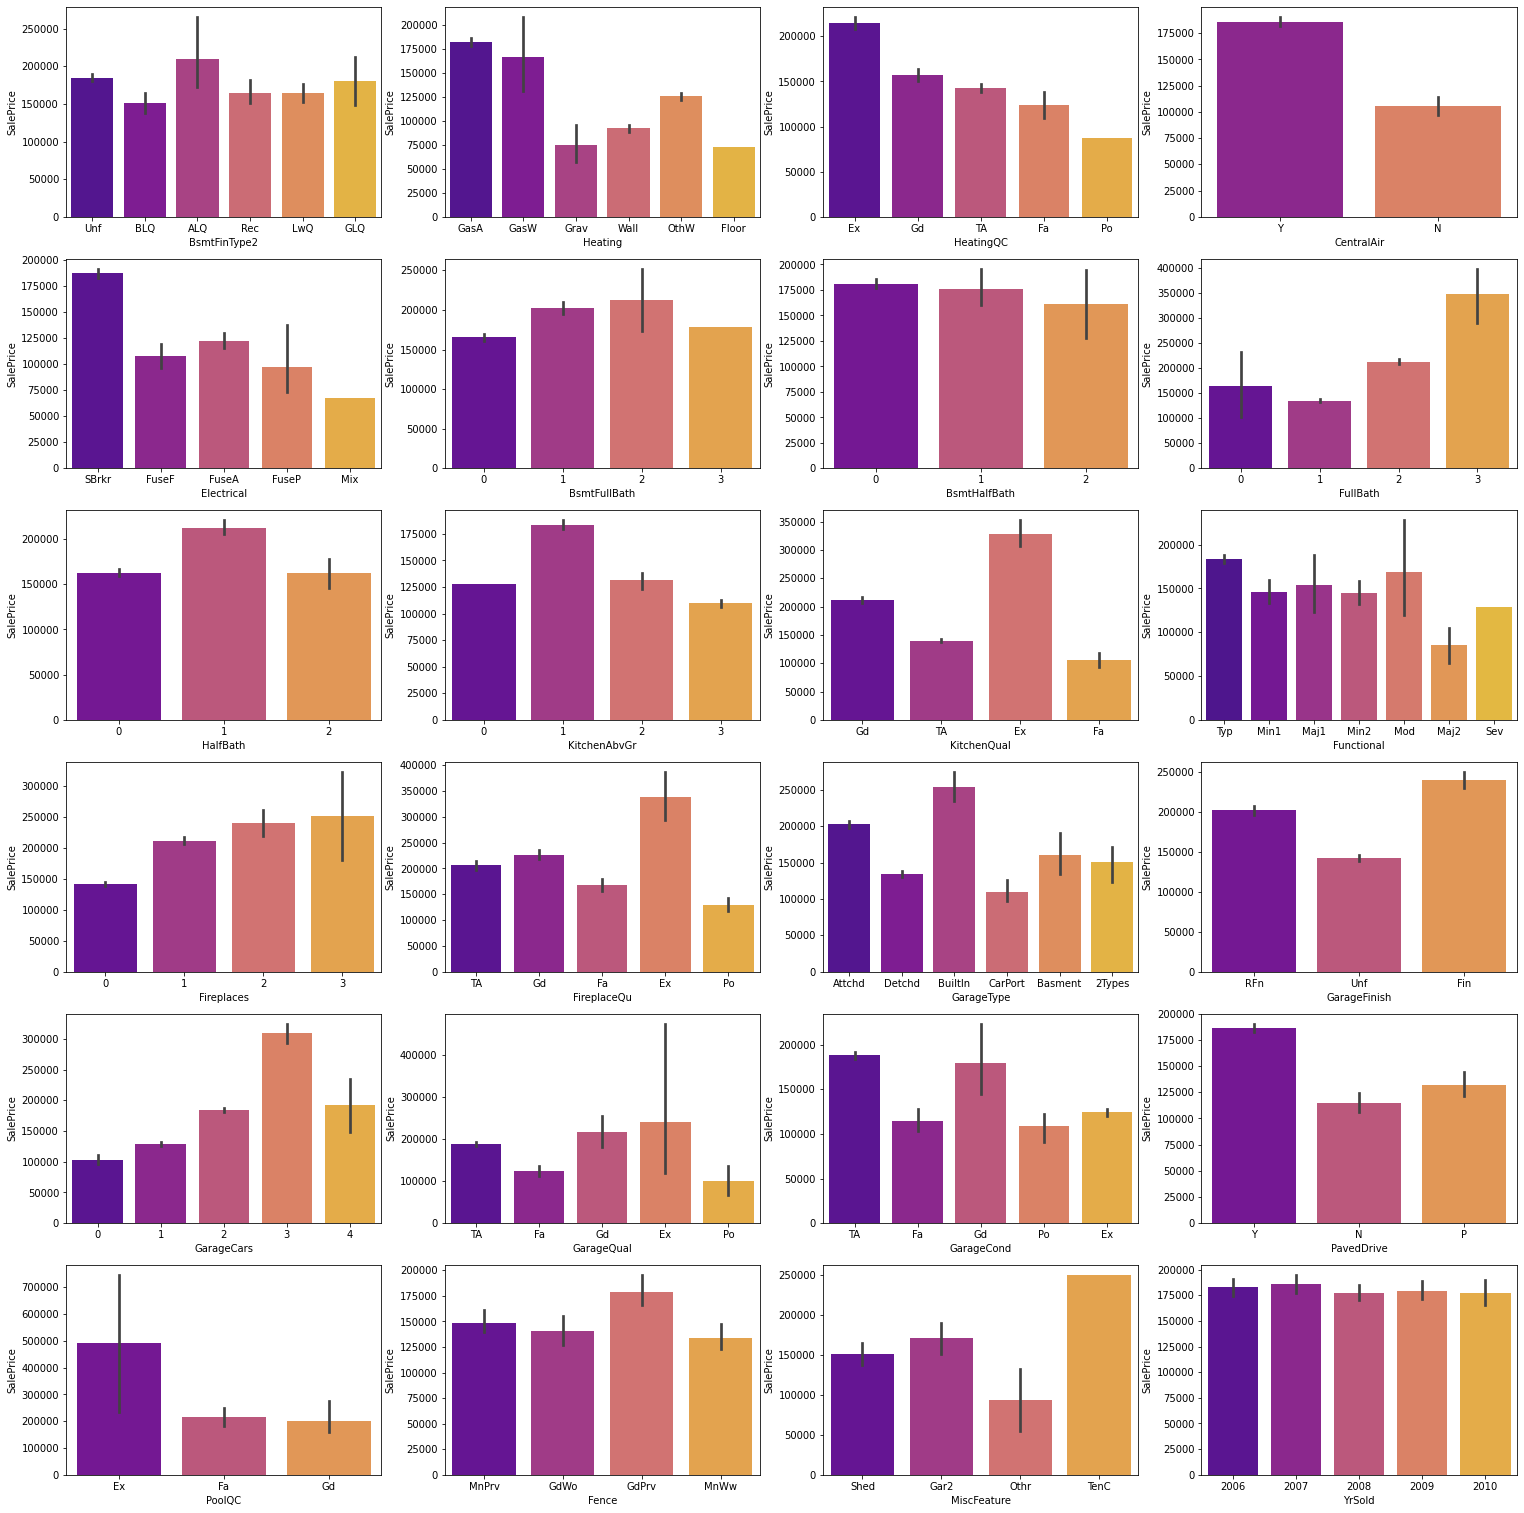

In [ ]:
L2=L[18:]    
fig, ax = plt.subplots(6,4,figsize=(26,27))
z=1
for i in L2:
    plt.subplot(6,4,z)
    Data[['SalePrice',i]].groupby([i],as_index=False).sum().sort_values(by='SalePrice',ascending=False)
    sns.barplot(x =i, y ='SalePrice', data = Data,
            palette ='plasma')
    z=z+1

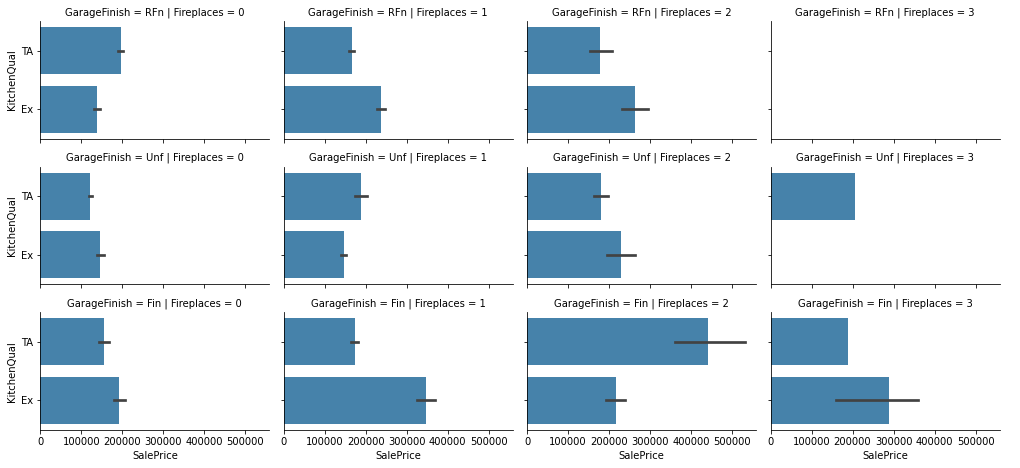

In [ ]:
grid = sns.FacetGrid(Data, row='GarageFinish', col='Fireplaces', size=2.2, aspect=1.6)
grid.map(sns.barplot ,'SalePrice', 'KitchenQual',alpha=.9).add_legend()

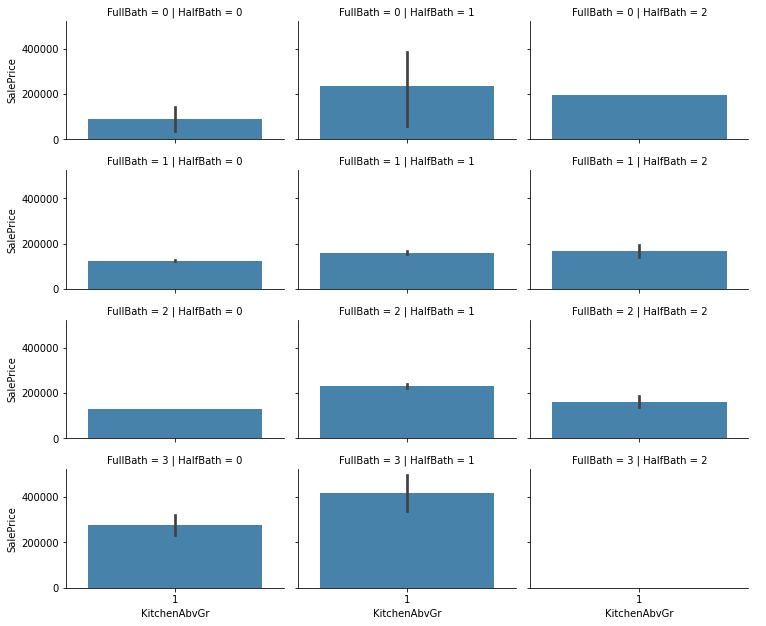

In [ ]:
grid = sns.FacetGrid(Data, row='FullBath', col='HalfBath', size=2.2, aspect=1.6)
grid.map(sns.barplot ,'KitchenAbvGr', 'SalePrice',alpha=.9).add_legend()

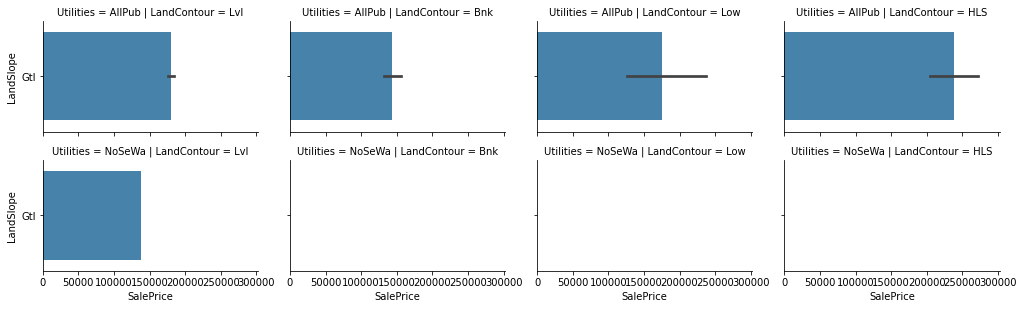

In [ ]:
grid = sns.FacetGrid(Data, row='Utilities', col='LandContour', size=2.2, aspect=1.6)
grid.map(sns.barplot ,'SalePrice', 'LandSlope',alpha=.9).add_legend()

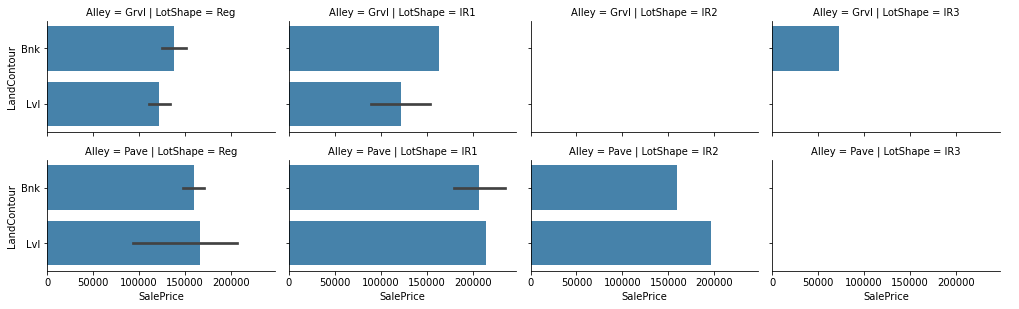

In [ ]:
grid = sns.FacetGrid(Data, row='Alley', col='LotShape', size=2.2, aspect=1.6)
grid.map(sns.barplot ,'SalePrice', 'LandContour',alpha=.9).add_legend()

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


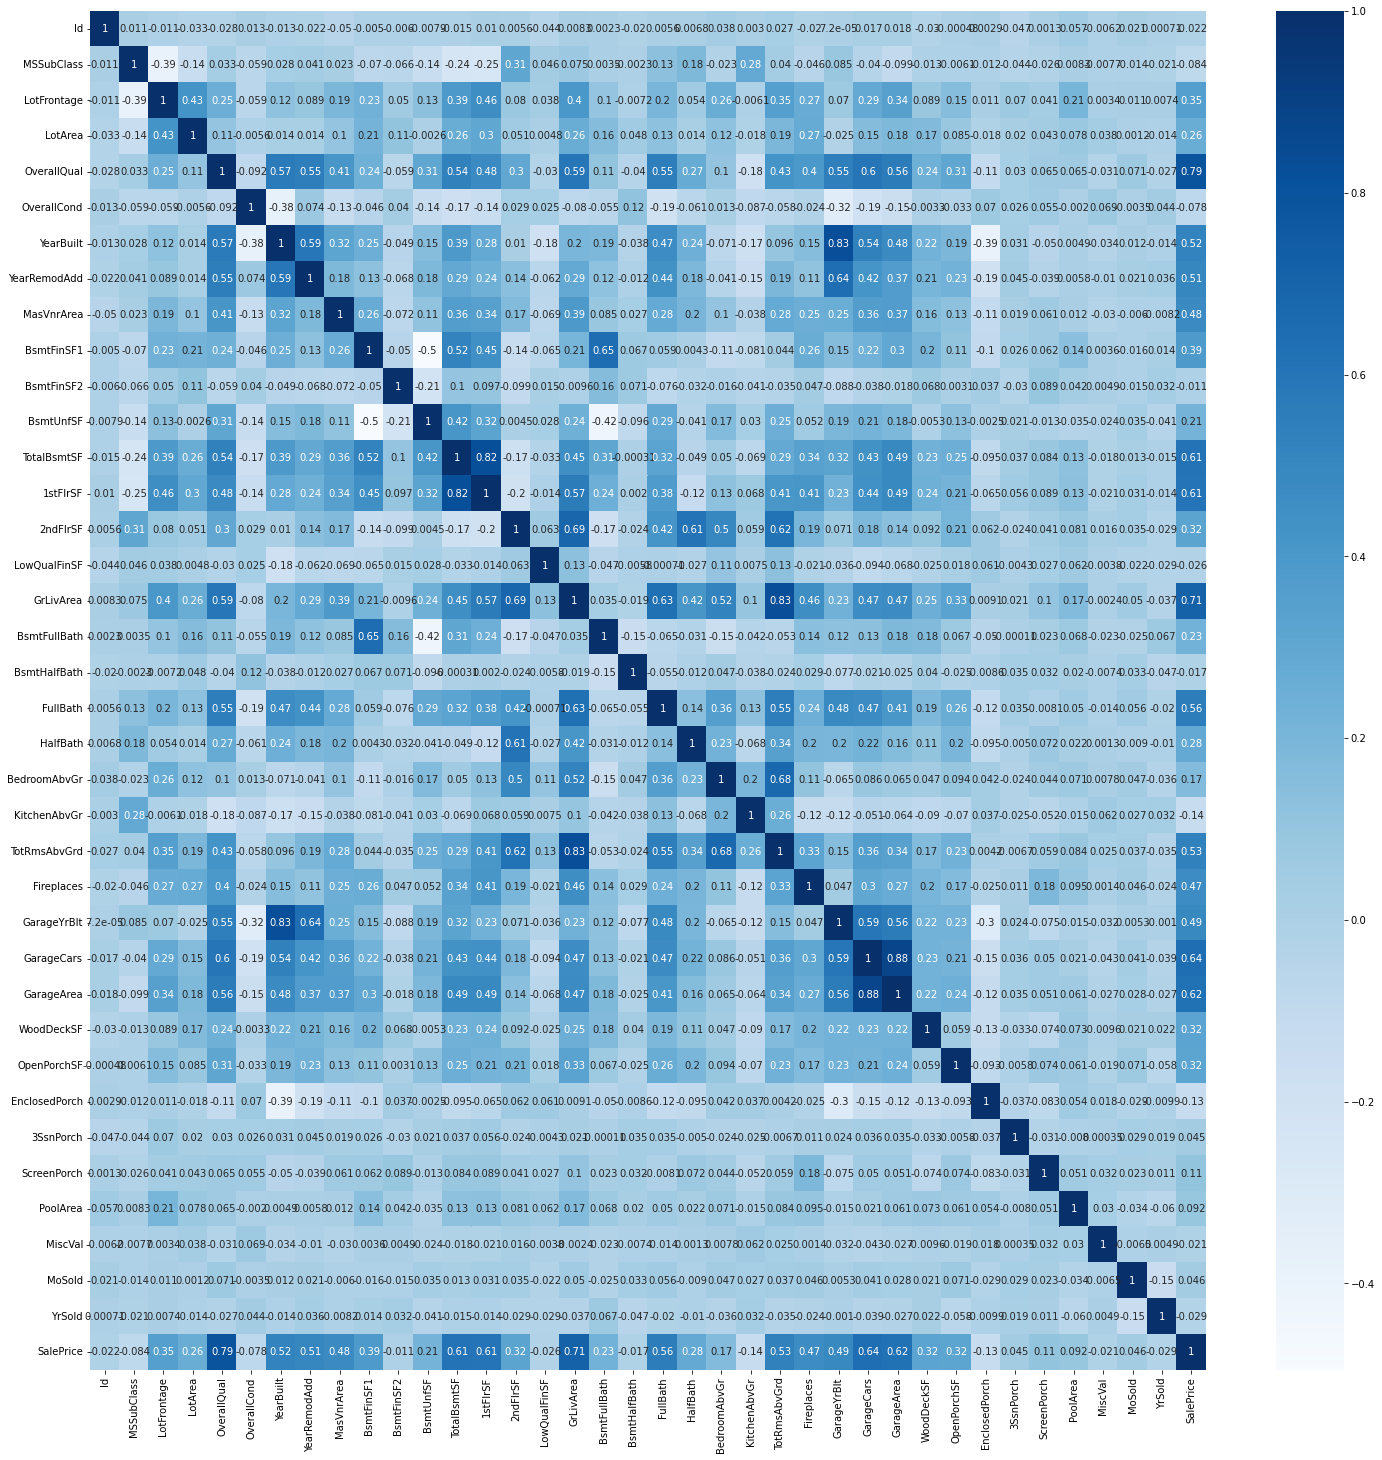

In [ ]:
fig,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(Data.corr(), annot = True,cmap= 'Blues')#, fmt='.6g'

In [ ]:
print('Data Shape = ',Data.shape)
encode_columns = list(Data.select_dtypes(exclude ='object').columns)
Data_coorr=[]
for i in encode_columns:
    if((Data[i].corr(Data['SalePrice']) >= 0.3) or (Data[i].corr(Data['SalePrice'])<= -0.3)):
         Data_coorr.append([Data['SalePrice'].corr(Data[i]),i])

Data Shape =  (1460, 81)


In [ ]:
Data_coorr

[[0.3517990965706781, 'LotFrontage'],
 [0.7909816005838044, 'OverallQual'],
 [0.5228973328794969, 'YearBuilt'],
 [0.5071009671113864, 'YearRemodAdd'],
 [0.4774930470957163, 'MasVnrArea'],
 [0.3864198062421532, 'BsmtFinSF1'],
 [0.6135805515591956, 'TotalBsmtSF'],
 [0.6058521846919147, '1stFlrSF'],
 [0.3193338028320681, '2ndFlrSF'],
 [0.7086244776126523, 'GrLivArea'],
 [0.5606637627484449, 'FullBath'],
 [0.5337231555820282, 'TotRmsAbvGrd'],
 [0.4669288367515272, 'Fireplaces'],
 [0.4863616774878609, 'GarageYrBlt'],
 [0.6404091972583529, 'GarageCars'],
 [0.6234314389183618, 'GarageArea'],
 [0.3244134445681295, 'WoodDeckSF'],
 [0.31585622711605554, 'OpenPorchSF'],
 [1.0, 'SalePrice']]

In [ ]:
Data_coorr= np.reshape(Data_coorr,(len(Data_coorr),len(Data_coorr[0])))
Data_coorr = pd.DataFrame(Data_coorr)
Data_coorr=Data_coorr.set_index(Data_coorr[0])
Data_coorr=Data_coorr.iloc[:, 1]

Data_coorr=Data_coorr.sort_index(ascending=False)

In [ ]:
print(Data_coorr)

0
1.0                       SalePrice
0.7909816005838044      OverallQual
0.7086244776126523        GrLivArea
0.6404091972583529       GarageCars
0.6234314389183618       GarageArea
0.6135805515591956      TotalBsmtSF
0.6058521846919147         1stFlrSF
0.5606637627484449         FullBath
0.5337231555820282     TotRmsAbvGrd
0.5228973328794969        YearBuilt
0.5071009671113864     YearRemodAdd
0.4863616774878609      GarageYrBlt
0.4774930470957163       MasVnrArea
0.4669288367515272       Fireplaces
0.3864198062421532       BsmtFinSF1
0.3517990965706781      LotFrontage
0.3244134445681295       WoodDeckSF
0.3193338028320681         2ndFlrSF
0.31585622711605554     OpenPorchSF
Name: 1, dtype: object


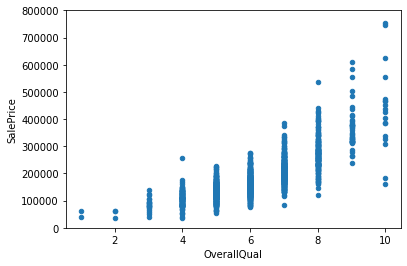

In [ ]:
var = 'OverallQual'
data = pd.concat([Data['SalePrice'], Data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [ ]:
Data = pd.DataFrame(Data)

encodde_columns = list(Data.select_dtypes(exclude ='object').columns)
#Data=Data.set_index(Data['Id'])

In [ ]:
Data_corr=Data_coorr[:8]
for i in  Data_corr:
    if i =='SalePrice' or i=='Id':
        continue
    Q1=Data[i].quantile(0.25)
    Q3=Data[i].quantile(0.75)    
    IQR = Q3 - Q1
    lowqe_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    print(lowqe_bound)
    price_df=Data[i]
    Data[i] = Data[i][~((Data[i] < lowqe_bound) |(Data[i] > upper_bound))]
    print('********')

2.0
********
158.625
********
-0.5
********
-27.75
********
42.0
********
118.125
********
-0.5
********


In [ ]:
Data_corr

0
1.0                     SalePrice
0.7909816005838044    OverallQual
0.7086244776126523      GrLivArea
0.6404091972583529     GarageCars
0.6234314389183618     GarageArea
0.6135805515591956    TotalBsmtSF
0.6058521846919147       1stFlrSF
0.5606637627484449       FullBath
Name: 1, dtype: object

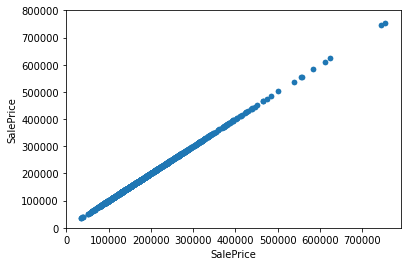

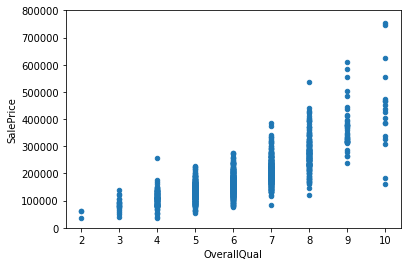

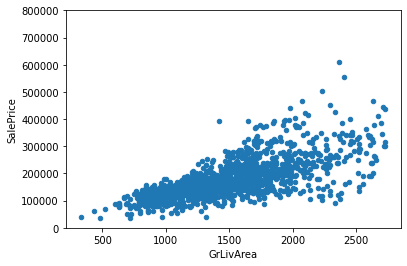

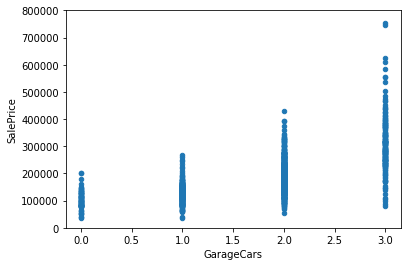

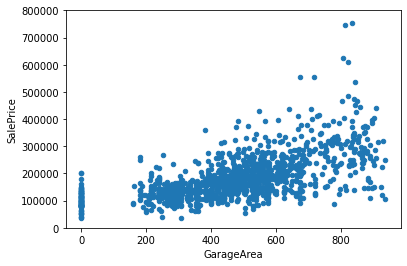

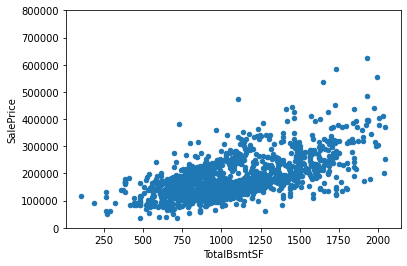

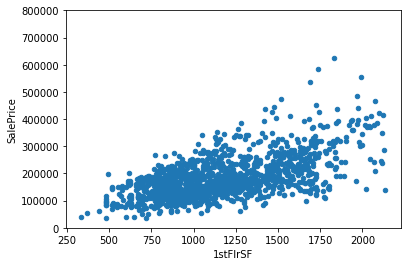

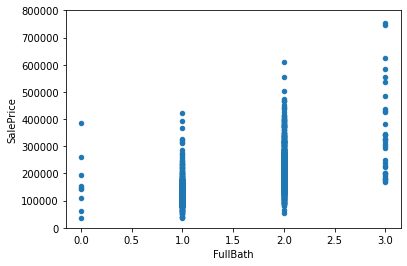

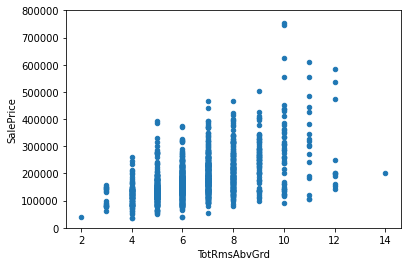

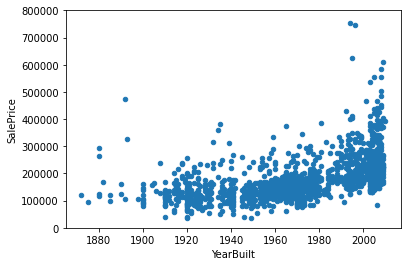

In [ ]:
for i in Data_coorr[:10]:
    var = i
    data = pd.concat([Data['SalePrice'], Data[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

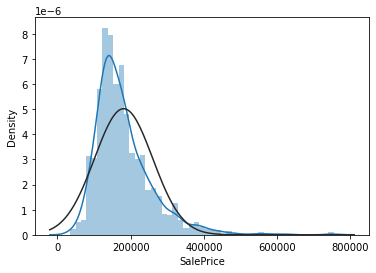

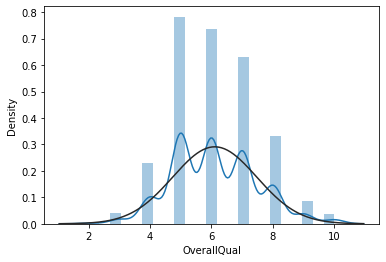

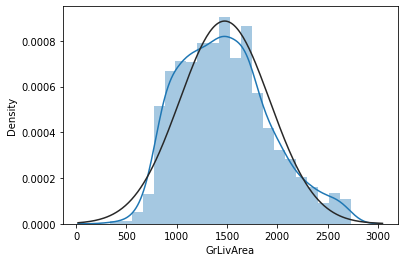

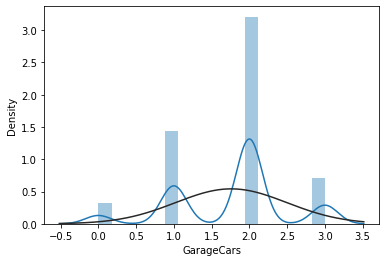

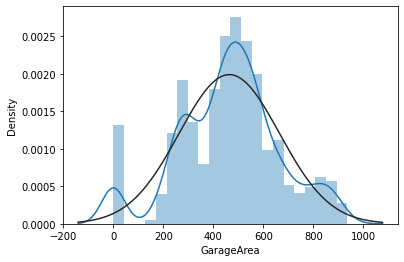

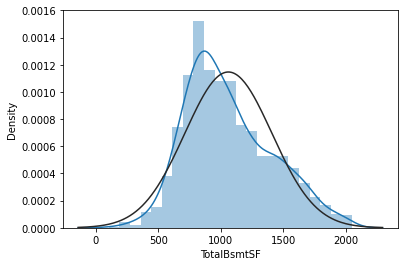

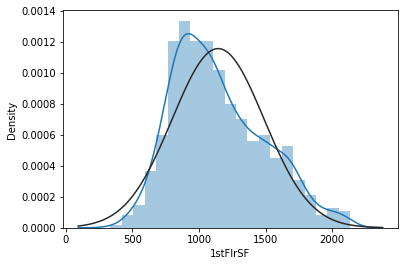

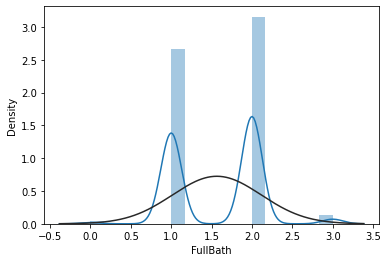

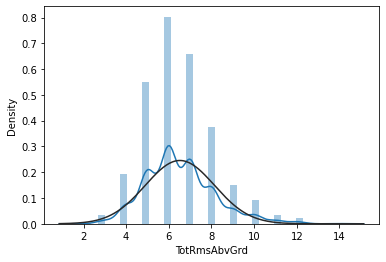

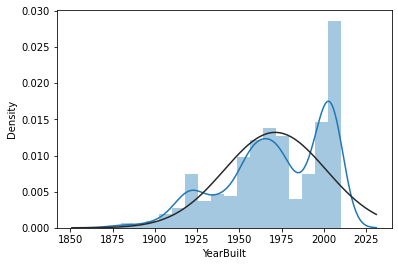

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy.stats import norm
from scipy import stats
for i in Data_coorr[:10]:
    sns.distplot(Data[i], fit=norm);
    fig = plt.figure()

In [ ]:
#sns.pairplot(Data[encode_columns], hue="species", diag_kind="hist")#, hue="species", diag_kind="hist"
Nulls=Data.isnull().sum()

In [ ]:
Nulls = Data.isnull().sum().sort_values(ascending=False)
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:40])
missing_data=missing_data[missing_data['Nulls']>=100]
print(missing_data)

               Nulls   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageCond        81  0.055479
GarageFinish      81  0.055479
GarageYrBlt       81  0.055479
GarageType        81  0.055479
GarageQual        81  0.055479
TotalBsmtSF       61  0.041781
BsmtExposure      38  0.026027
BsmtFinType2      38  0.026027
BsmtCond          37  0.025342
BsmtQual          37  0.025342
BsmtFinType1      37  0.025342
GrLivArea         31  0.021233
GarageArea        21  0.014384
1stFlrSF          20  0.013699
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
GarageCars         5  0.003425
OverallQual        2  0.001370
Electrical         1  0.000685
BsmtHalfBath       0  0.000000
Functional         0  0.000000
FullBath           0  0.000000
HalfBath           0  0.000000
SaleCondition      0  0.000000
BedroomAbvGr       0  0.000000
KitchenA

In [ ]:
Data = Data.drop((missing_data).index,1)

#Data = Data.drop(Data.loc[Data['Electrical'].isnull()].index)

Nul=Data.isnull().sum().sort_values(ascending=False)
print(Nul[:20])

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
TotalBsmtSF     61
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
GrLivArea       31
GarageArea      21
1stFlrSF        20
MasVnrArea       8
MasVnrType       8
GarageCars       5
OverallQual      2
Electrical       1
WoodDeckSF       0
dtype: int64


In [ ]:
Data.shape

(1460, 75)

In [ ]:
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

In [ ]:
encode_columns = list(Data.select_dtypes(['object']).columns)
New_Data, encoders = label_encode_columns(df=Data, columns=encode_columns)


print('Updates dataframe is : \n' ,New_Data )
 
col=list(New_Data.columns)

Updates dataframe is : 
         Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0        1          60         3     8450       1         3            3   
1        2          20         3     9600       1         3            3   
2        3          60         3    11250       1         0            3   
3        4          70         3     9550       1         0            3   
4        5          60         3    14260       1         0            3   
...    ...         ...       ...      ...     ...       ...          ...   
1455  1456          60         3     7917       1         3            3   
1456  1457          20         3    13175       1         3            3   
1457  1458          70         3     9042       1         3            3   
1458  1459          20         3     9717       1         3            3   
1459  1460          20         3     9937       1         3            3   

      Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3Ss

In [ ]:
col=New_Data.columns
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
imp = imp.fit(New_Data)
New_Data = imp.transform(New_Data)
New_Data= np.reshape(New_Data,(len(New_Data),len(New_Data[0])))
New_Data = pd.DataFrame(New_Data,columns=col)

In [ ]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [ ]:
print('Data Shape = ',New_Data.shape)
encode_columns = list(New_Data.columns)
Data_coorr=[]
Drop_col=[]
for i in encode_columns:
    if((New_Data[i].corr(New_Data['SalePrice']) <= 0.07) and (New_Data[i].corr(New_Data['SalePrice'])>= -0.07)):
        #New_Data.drop(i, axis=1, inplace=True)
        Drop_col.append(i)
        print(i)
    elif((New_Data[i].corr(New_Data['SalePrice']) >= 0.3) or (New_Data[i].corr(Data['SalePrice'])<= -0.3)):
         Data_coorr.append([New_Data['SalePrice'].corr(New_Data[i]),i])

Data Shape =  (1460, 75)
Id
Street
LandContour
Utilities
LotConfig
LandSlope
Condition2
MasVnrType
BsmtCond
BsmtFinType2
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
GarageQual
GarageCond
3SsnPorch
MiscVal
MoSold
YrSold
SaleType


In [ ]:
Drop_col
D=New_Data
x=D.loc[:,Drop_col]

model = PCA(n_components= 4, svd_solver='full')#it can be full,arpack,randomized
model.fit(x)

data = model.transform(x)
data = pd.DataFrame(data)

New_Data = pd.concat([New_Data, data], axis=1)
New_Data.drop(Drop_col, axis=1, inplace=True)

In [ ]:
New_Data.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice,0,1,2,3
0,60.0,3.0,8450.0,3.0,5.0,2.0,0.0,5.0,7.0,5.0,...,61.0,0.0,0.0,0.0,4.0,208500.0,-29.637652,-730.017976,-48.424669,-9.364311
1,20.0,3.0,9600.0,3.0,24.0,1.0,0.0,2.0,6.0,8.0,...,0.0,0.0,0.0,0.0,4.0,181500.0,-29.656744,-729.018087,-48.422827,-9.361166
2,60.0,3.0,11250.0,0.0,5.0,2.0,0.0,5.0,7.0,5.0,...,42.0,0.0,0.0,0.0,4.0,223500.0,-29.676095,-728.017441,-48.421106,-9.362284
3,70.0,3.0,9550.0,0.0,6.0,2.0,0.0,5.0,7.0,5.0,...,35.0,272.0,0.0,0.0,0.0,140000.0,-29.694736,-727.019290,-48.416652,-9.344164
4,60.0,3.0,14260.0,0.0,15.0,2.0,0.0,5.0,8.0,5.0,...,84.0,0.0,0.0,0.0,4.0,250000.0,-29.714263,-726.017825,-48.416331,-9.355366


In [ ]:
y=New_Data.loc[:,'SalePrice']
X=New_Data.drop(['SalePrice'], axis=1)

In [ ]:
url = "https://drive.google.com/file/d/1PpF3DppUhcr77NTjiwpf_9K98G8zhD2s/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Test_Data = pd.read_csv(path)
Test_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
Nulls = Test_Data.isnull().sum().sort_values(ascending=False)
percent = (Test_Data.isnull().sum()/Test_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:40])
missing_data=missing_data[missing_data['Nulls']>=100]
print(missing_data)
Test_Data = Test_Data.drop((missing_data).index,1)

#Data = Data.drop(Data.loc[Data['Electrical'].isnull()].index)


              Nulls   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageCond       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371
Utilities         2  0.001371
Functional        2  0.001371
BsmtFullBath      2  0.001371
BsmtFinSF1        1  0.000685
BsmtFinSF2        1  0.000685
BsmtUnfSF         1  0.000685
KitchenQual       1  0.000685
TotalBsmtSF       1  0.000685
Exterior2nd       1  0.000685
GarageCars        1  0.000685
Exterior1st       1  0.000685
GarageArea        1  0.000685
SaleType  

In [ ]:
Nuls = Test_Data.isnull().sum().sort_values(ascending=False)
print(Nuls[:20])

GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
dtype: int64


In [ ]:
cools=Test_Data.columns
encodee_columns = list(Test_Data.select_dtypes(['object']).columns)
Test_Data, encoderss = label_encode_columns(df=Test_Data, columns=encodee_columns)

imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
imp = imp.fit(Test_Data)


Test_Data = imp.transform(Test_Data)
Test_Data= np.reshape(Test_Data,(len(Test_Data),len(Test_Data[0])))

Test_Data = pd.DataFrame(Test_Data,columns=cools)

Drop_col
D=Test_Data
x=D.loc[:,Drop_col]

model = PCA(n_components= 4, svd_solver='full')#it can be full,arpack,randomized
model.fit(x)

data = model.transform(x)
data = pd.DataFrame(data)

Test_Data = pd.concat([Test_Data, data], axis=1)
Test_Data.drop(Drop_col, axis=1, inplace=True)

Nuls = Test_Data.isnull().sum().sort_values(ascending=False)
print(Nuls[:20])
#sc_X = StandardScaler()
#X_Test = sc_X.fit_transform(Test_Data)
#X_Test=Test_Data
#print(X_Test)


MSSubClass      0
GarageYrBlt     0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
GarageType      0
GarageFinish    0
MSZoning        0
GarageCars      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_Test = sc.transform(Test_Data)
y=(y-y.min())/(y.std())

In [ ]:
print(Test_Data)
VD=Test_Data.iloc[:,1]

print(VD.shape)

      MSSubClass  MSZoning  LotArea  LotShape  Neighborhood  Condition1  \
0           20.0       2.0  11622.0       3.0          12.0         1.0   
1           20.0       3.0  14267.0       0.0          12.0         2.0   
2           60.0       3.0  13830.0       0.0           8.0         2.0   
3           60.0       3.0   9978.0       0.0           8.0         2.0   
4          120.0       3.0   5005.0       0.0          22.0         2.0   
...          ...       ...      ...       ...           ...         ...   
1454       160.0       4.0   1936.0       3.0          10.0         2.0   
1455       160.0       4.0   1894.0       3.0          10.0         2.0   
1456        20.0       3.0  20000.0       3.0          11.0         2.0   
1457        85.0       3.0  10441.0       3.0          11.0         2.0   
1458        60.0       3.0   9627.0       3.0          11.0         2.0   

      BldgType  HouseStyle  OverallQual  OverallCond  ...  WoodDeckSF  \
0          0.0         2.0

In [ ]:
VD=(VD-VD.min())/(VD.std())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

In [ ]:
DTR = DecisionTreeRegressor(random_state=True)
DTR.fit(X,y)
print('DecisionTreeRegressor')
print('score = ',DTR.score(X,y))
VD_predict2=DTR.predict(X_Test)
MSEValue = mean_squared_error(VD, VD_predict2, multioutput='uniform_average')
print('Mean_squared_error = ',MSEValue)

DecisionTreeRegressor
score =  1.0
Mean_squared_error =  8.87288086676956


In [ ]:
RFR = RandomForestRegressor(random_state=True)
RFR.fit(X,y)
print('RandomForestRegressor')
print('score = ',RFR.score(X,y))
VD_predict1=RFR.predict(X_Test)
MSEValue = mean_squared_error(VD, VD_predict1, multioutput='uniform_average')
print('Mean_squared_error = ',MSEValue)

RandomForestRegressor
score =  0.980940007211912
Mean_squared_error =  8.803974520058544


In [ ]:
LR = LinearRegression(n_jobs=-1)
LR.fit(X,y)

print('LinearRegression')

print('score = ',LR.score(X,y))
VD_predict3=DTR.predict(X_Test)
MSEValue = mean_squared_error(VD, VD_predict3, multioutput='uniform_average')
print('Mean_squared_error = ',MSEValue)

LinearRegression
score =  0.8494647433944749
Mean_squared_error =  8.87288086676956


In [ ]:
LR = SVR()
LR.fit(X,y)
print('SVR')

print('score = ',LR.score(X,y))
VD_predict4=DTR.predict(X_Test)
MSEValue = mean_squared_error(VD, VD_predict4, multioutput='uniform_average')
print('Mean_squared_error = ',MSEValue)

SVR
score =  0.9011424573418773
Mean_squared_error =  8.87288086676956


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

params=[{'fit_intercept':(True,False)},
            {'min_samples_split':[6,8,12],
             'max_depth':[10,20,30]},
             {'n_estimators':[100,300,200],
             'max_depth':[6,10,15]},
             {'alpha': [0.1,300,10,500,1000,200]},
    {'kernel':('linear', 'poly'),
             'C':[100,200,400],
             'epsilon':[10,100],
     'gamma':('scale', 'auto')}]
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
LR = LinearRegression(copy_X=True)
SaVR = SVR()
DTR = DecisionTreeRegressor(random_state=False)
RFR = RandomForestRegressor(random_state=False)
RM = Ridge(random_state=False)

models=[LR,DTR,RFR,RM,SaVR]

for model,param in zip(models,params):
    print('Model is ',model)
    for i in range (5,15):
        GridSearchModel = GridSearchCV(model,param, cv = i,return_train_score=True, n_jobs=-1)
        GridSearchModel.fit(X, y)
        VD_predict=GridSearchModel.predict(X_Test)
        print(VD_predict.shape)
        MSEValue = mean_squared_error(VD, VD_predict, multioutput='uniform_average') 
        
        sorted(GridSearchModel.cv_results_.keys())
        #accuracy = accuracy_score(ViD, CVS_prediction, normalize=False)
        #GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]
        print('CV = ',i)
# Showing Results
        #print('All Results are :\n', GridSearchResults )
        print('Best Score is :', GridSearchModel.best_score_)
        print('Best Parameters are :', GridSearchModel.best_params_)
        print('Mean_squared_error = ',MSEValue)
        print(VD_predict[:5])
        #print('Best Estimator is :', GridSearchModel.best_estimator_)
        print('---------------------------')
    print('\t\t**********************************************************')

Model is  LinearRegression()
(1459,)
CV =  5
Best Score is : 0.8169243899125496
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  6
Best Score is : 0.7908728199833849
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  7
Best Score is : 0.7884211001496639
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  8
Best Score is : 0.7922376302151439
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  9
Best Score is : 0.7899544865024116
Best Parameters are : {'fit_inte

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params=[{'fit_intercept':(True,False)},
            {'min_samples_split':[6,8,12],
             'max_depth':[10,20,30]},
             {'n_estimators':[100,300,200],
             'max_depth':[6,10,15]},
             {'alpha': [0.1,300,10,500,1000,200]},
    {'kernel':('linear', 'poly'),
             'C':[100,200,400],
             'epsilon':[10,100],
     'gamma':('scale', 'auto')}]
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
LR = LinearRegression(copy_X=True)
SaVR = SVR()
DTR = DecisionTreeRegressor(random_state=False)
RFR = RandomForestRegressor(random_state=False)
RM = Ridge(random_state=False)

models=[LR,DTR,RFR,RM,SaVR]

for model,param in zip(models,params):
    print('Model is ',model)
    for i in range (5,15):
        #GridSearchModel = GridSearchCV(model,param, cv = i,return_train_score=True, n_jobs=-1)
        RandomizedSearchModel=RandomizedSearchCV(model, param, n_iter=10, scoring=None, n_jobs=-1,cv=i, random_state=5)
        #GridSearchModel.fit(X, y)
        RandomizedSearchModel.fit(X,y)
        #VD_predict=GridSearchModel.predict(X_Test)
        VD_predict=RandomizedSearchModel.predict(X_Test)
        print(VD_predict.shape)
        MSEValue = mean_squared_error(VD, VD_predict, multioutput='uniform_average') 
        
        sorted(RandomizedSearchModel.cv_results_.keys())
        #accuracy = accuracy_score(ViD, CVS_prediction, normalize=False)
        #GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]
        print('CV = ',i)
# Showing Results
        #print('All Results are :\n', GridSearchResults )
        #print('Best Score is :', GridSearchModel.best_score_)
        print('Best Score is :', RandomizedSearchModel.best_score_)
        #print('Best Parameters are :', GridSearchModel.best_params_)
        print('Best Parameters are :', RandomizedSearchModel.best_params_)
        print('Mean_squared_error = ',MSEValue)
        print(VD_predict[:5])
        #print('Best Estimator is :', GridSearchModel.best_estimator_)
        print('---------------------------')
    print('\t\t**********************************************************')

Model is  LinearRegression()
(1459,)
CV =  5
Best Score is : 0.8169243899125496
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  6
Best Score is : 0.7908728199833849
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  7
Best Score is : 0.7884211001496639
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  8
Best Score is : 0.7922376302151439
Best Parameters are : {'fit_intercept': True}
Mean_squared_error =  9.283681197566708
[0.90487008 1.40749264 1.65692422 1.91134275 1.93829409]
---------------------------
(1459,)
CV =  9
Best Score is : 0.7899544865024116
Best Parameters are : {'fit_inte